# Day 13: Care Package

https://adventofcode.com/2019/day/13

In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm
from celluloid import Camera

from AOC2019 import Intcode, readIntcodeProg

In [14]:
prog = readIntcodeProg("input13.txt")

## Part 1

In [15]:
def arcade(prog,inp=0):
    a = Intcode(prog,"ARCADE")
    output = []
    while(not a.isHalted):
        a.runProgram(inp)
        out = a.getLastOutput()
        output.append(out)
    return output
    
output = arcade(prog)
print(len(output),output[len(output)-1])

2593 1


The lenght of the output looks a bit weird, I would have expected a multiple of 3 (x,y,tileID), while there seems to be a value in excess (?)

In [16]:
def arcadeScreen(output):
    x = []
    y = []
    tileID = []
    j = 0
    for o in output:
        if   j==0: x.append(o)
        elif j==1: y.append(o)
        elif j==2: tileID.append(o)
        j+=1
        if j==3: 
            j=0
    shape = (max(y)+1,max(x)+1)
    screen = np.zeros(shape)
    for i in range(len(tileID)):
        screen[y[i],x[i]] = tileID[i]
    return x,y,tileID,screen

x, y, tileID, screen = arcadeScreen(output)
print(len(x),len(y),len(tileID),max(y),max(x),max(y)*max(x),x[len(x)-1])
print(tileID.count(2))

865 864 864 23 35 805 1
213


24

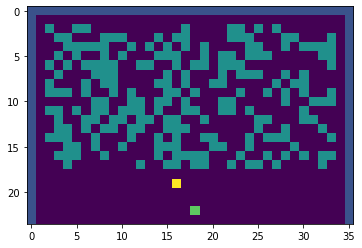

In [33]:
plt.imshow(screen)
screen.shape[0]

## Part 2

In [39]:
# Execute 3 steps of the game Intcode computer with a given input
# Returns a vector of the corresponsing outputs
# Vector should have lenght 3 [x,y,tile] unless program is halted (check this in game loop!)

def gameStep(g,inp):
    out = []
    i = 0
    while (i<3):
        i += 1
        g.runProgram(inp)
        if(g.isHalted):
            break
        out.append(g.getLastOutput())
    return out

Playing the ARCADE game automatically... ************************************************************************************************************************************************************************************************************************************************** GAME ENDED!
STEPS:   24256
FRAMES:  11485
SCORE:   11441


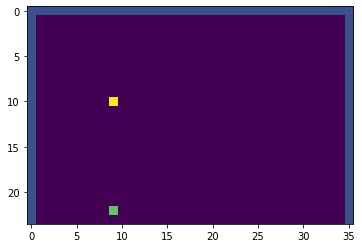

In [40]:
# Change first bit of program according to instructions
prog2 = list(prog)
prog2[0] = 2

# Initialise the game Intcode computer
g = Intcode(prog2,"GAME")

score = 0
PADDLE = 3
BALL = 4
x_paddle = -1
x_ball = -1

# matrix and camera to save gae visualisation
newscreen = screen.copy()
fig = plt.figure()
#camera = Camera(fig)

print("Playing the ARCADE game automatically... ",end="")

# Leave the joystick at its initial position at the beginning of the game
inp = 0

istep = 0 # count how many sets of 3 program steps are needed to complete the game

# snap a first frame at the beginning of the game
plt.imshow(newscreen)
camera.snap()
iframe = 1

while(True): # game loop
    
    istep += 1
    if istep%100==0:
        print("*",end="")
    
    # perform one game step
    out = gameStep(g,inp)
    
    if len(out)<3: # len(out) should be 3 unless the game program termined
        print(" GAME ENDED!")
        break
    
    # get tile info
    x, y, tile = out
    
    if [x,y] == [-1,0]: # check if it's a score output, if so save
        score = tile
    else:
        newscreen[y,x] = tile # draw current tile
                
    # automatize game
    if tile==PADDLE:
        x_paddle = x # store where the paddle is
    if tile==BALL: # found the ball
        x_ball = x
        # move the joystick toward the ball
        if   (x_paddle>x_ball): # move left
            inp = -1
        elif (x_paddle<x_ball): # move right
            inp = +1
        else: # leave where it is
            inp = 0

    if tile==PADDLE or tile==BALL: # snap a frame every time paddle or ball are drawn
        plt.imshow(newscreen)
        camera.snap()
        iframe += 1

# snap a last frame at the end of the game
plt.imshow(newscreen)
camera.snap()

print("STEPS:  ",istep)
print("FRAMES: ",iframe)
print("SCORE:  ",score)

In [42]:
anim = camera.animate(blit=True)

In [ ]:
anim.save('day13animation.mp4',fps=30)
#anim.save('day13animation.gif', writer='imagemagick', fps=30)